# Linear Regression from Scratch

In this notebook, we will implement linear regression using custom Python code. We will cover the following steps:

- Generating synthetic data
- Visualizing the data
- Implementing the linear regression algorithm
- Training the model
- Evaluating the results

Let's get started!

In [2]:
#import the module
import torch
import seaborn as sns
import matplotlib.pyplot as plt

In [11]:
#generate random data
torch.manual_seed(0)
#random uniform distribution fallowing the monte carlo method
x_rand = torch.rand(100) * 6 - 3
x_rand = x_rand.unsqueeze(1)
y_rand = 2*x_rand + torch.randn(x_rand.shape)*0.9
print(x_rand.shape, y_rand.shape)

torch.Size([100, 1]) torch.Size([100, 1])


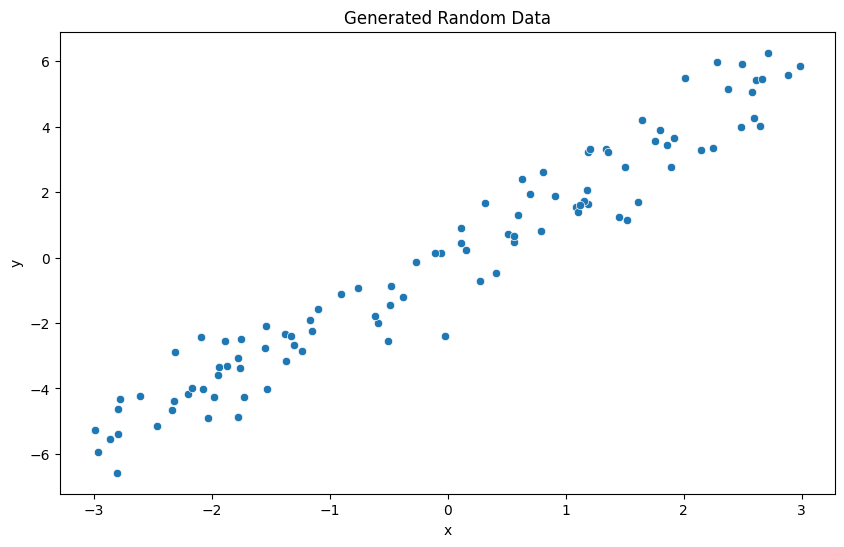

In [4]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy())
plt.title('Generated Random Data')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

Basic math
y_pred = m*x_rand + c
so we need m and c to generate, first let's calculate randomly and backpropagation willl handle it
mean squared error
((y_pred - y_rand)**2).mean()



Epoch 0, Loss: 15.716687202453613, m: -0.11987628042697906, c: -1.0376003980636597
Epoch 10, Loss: 5.3194899559021, m: 0.8228247165679932, c: -0.8689790964126587
Epoch 20, Loss: 2.2664132118225098, m: 1.3219367265701294, c: -0.7221493721008301
Epoch 30, Loss: 1.3096165657043457, m: 1.5867431163787842, c: -0.5973815321922302
Epoch 40, Loss: 0.9716119170188904, m: 1.7276870012283325, c: -0.4928887188434601
Epoch 50, Loss: 0.8295736908912659, m: 1.803070068359375, c: -0.4061516225337982
Epoch 60, Loss: 0.7579770684242249, m: 1.843684196472168, c: -0.33455222845077515
Epoch 70, Loss: 0.7166200280189514, m: 1.8658043146133423, c: -0.2756560146808624
Epoch 80, Loss: 0.6907880902290344, m: 1.8780430555343628, c: -0.2273174524307251
Epoch 90, Loss: 0.6740281581878662, m: 1.8849653005599976, c: -0.18770073354244232


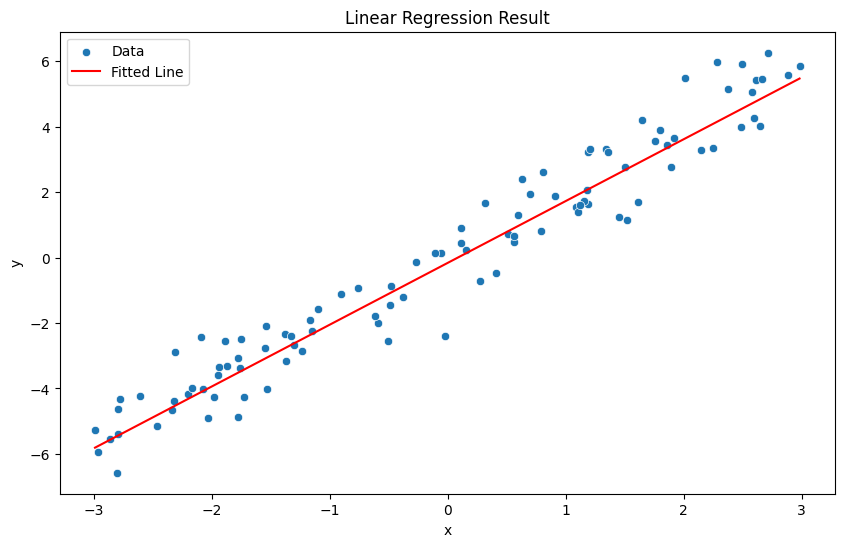

In [13]:
#implementing linear regression
#lets assign initial values for m and c
m = torch.randn(1)
c = torch.randn(1) 


#lets update m and c using the gradients
learning_rate = 0.01  
epochs = 100
for epoch in range(epochs):
    #forward pass
    Y_pred = m * x_rand + c    
    #calculate loss MAE
    #mean squared error



    #mse
    loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
    #rmse
    #loss = torch.sqrt(loss)

    error = Y_pred - y_rand

    #calculate gradients
    m_grad =  (2/len(x_rand))*torch.sum(error*x_rand)
    c_grad = (2/len(x_rand))*torch.sum(error)

    #update m and c
    m =m -  learning_rate * m_grad
    c = c -  learning_rate * c_grad
    #print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, m: {m.item()}, c: {c.item()}')  
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

Epoch 0, Loss: 34.228572845458984, RMSE: 5.850519180297852, m: -1.1814578771591187, c: -0.787451446056366, Learning Rate: 0.01
Epoch 10, Loss: 10.297075271606445, RMSE: 3.2089056968688965, m: 0.2649924159049988, c: -0.6747555732727051, Learning Rate: 0.01
Epoch 20, Loss: 3.536203622817993, RMSE: 1.8804796934127808, m: 1.029413104057312, c: -0.5687925815582275, Learning Rate: 0.01
Epoch 30, Loss: 1.5861101150512695, RMSE: 1.2594085931777954, m: 1.4338397979736328, c: -0.47487369179725647, Learning Rate: 0.01
Epoch 40, Loss: 0.9972560405731201, RMSE: 0.9986270666122437, m: 1.6481698751449585, c: -0.39424949884414673, Learning Rate: 0.01
Epoch 50, Loss: 0.8024482131004333, RMSE: 0.8957947492599487, m: 1.7620525360107422, c: -0.326312392950058, Learning Rate: 0.01
Epoch 60, Loss: 0.7275385856628418, RMSE: 0.8529587388038635, m: 1.8228038549423218, c: -0.26970601081848145, Learning Rate: 0.01
Epoch 70, Loss: 0.6928552389144897, RMSE: 0.8323792815208435, m: 1.8554073572158813, c: -0.22286795

Text(0, 0.5, 'y')

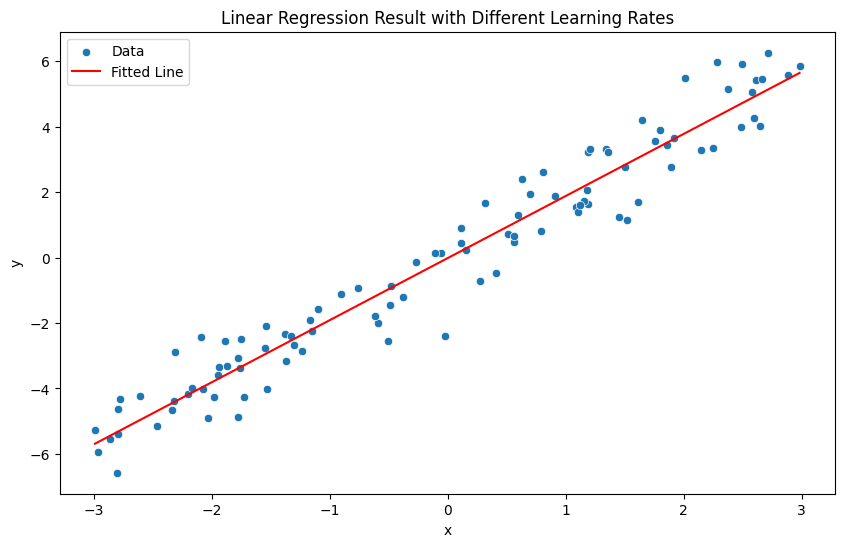

In [19]:
m = torch.randn(1)
c=  torch.randn(1)
epochs = 100
lrs = [0.01, 0.001, 0.002, 0.02, 0.03]
for lr in lrs:
    m = torch.randn(1)
    c = torch.randn(1)
    for epoch in range(epochs):
        Y_pred = m * x_rand + c
        error = Y_pred - y_rand
        #mean squared error
        loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
        loss_rmse = torch.sqrt(loss)
        m_grad = (2 / len(x_rand)) * torch.sum(error * x_rand)
        c_grad = (2 / len(x_rand)) * torch.sum(error)
        m = m - lr * m_grad
        c = c - lr * c_grad

        #print loss every 10 epochs
        if epoch % 10 == 0:
            print(f'Epoch {epoch}, Loss: {loss.item()}, RMSE: {loss_rmse.item()}, m: {m.item()}, c: {c.item()}, Learning Rate: {lr}')    
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result with Different Learning Rates')
plt.xlabel('x')
plt.ylabel('y')

In [22]:
best_m = None
best_c = None
best_loss = float('inf')
epochs = 100
lrs = [0.01, 0.001, 0.002, 0.02, 0.03]
for lr in lrs:
    m =torch.randn(1)
    c = torch.randn(1)
    for epoch in range(epochs):
        Y_pred = m*x_rand+c
        error  = Y_pred - y_rand
        loss = torch.sum(abs(error)**2)/len(x_rand)
        if loss < best_loss:
            best_loss = loss
            best_m = m
            best_c = c
        m_grad = (2/len(x_rand))*torch.sum(error*x_rand)
        c_grad = (2/len(x_rand))*torch.sum(error)
        m = m - lr * m_grad
        c = c - lr * c_grad
        
    print(f"LR: {lr:.4f}, Final Loss: {loss.item():.4f}, m: {m.item():.4f}, c: {c.item():.4f}")

# Best parameters across all LRs
print(f"\nBest Parameters: m = {best_m.item():.4f}, c = {best_c.item():.4f}, Loss = {best_loss.item():.4f}")
        
        




LR: 0.0100, Final Loss: 0.6575, m: 1.8979, c: 0.1167
LR: 0.0010, Final Loss: 2.3243, m: 1.1638, c: -0.0809
LR: 0.0020, Final Loss: 3.7891, m: 1.2334, c: 1.2614
LR: 0.0200, Final Loss: 0.6410, m: 1.8967, c: -0.0215
LR: 0.0300, Final Loss: 0.6409, m: 1.8971, c: -0.0091

Best Parameters: m = 1.8971, c = -0.0090, Loss = 0.6409


Epoch 0, Loss: 3.737727642059326, m: 1.276268720626831, c: 1.2350562810897827
Epoch 10, Loss: 2.1088340282440186, m: 1.5814166069030762, c: 1.001489281654358
Epoch 20, Loss: 1.4545035362243652, m: 1.7402127981185913, c: 0.8135597705841064
Epoch 30, Loss: 1.138023853302002, m: 1.8222119808197021, c: 0.6615183353424072
Epoch 40, Loss: 0.9601345658302307, m: 1.8640273809432983, c: 0.5380659699440002
Epoch 50, Loss: 0.8506072163581848, m: 1.8849108219146729, c: 0.4375894069671631
Epoch 60, Loss: 0.7800166606903076, m: 1.8949679136276245, c: 0.3556864261627197
Epoch 70, Loss: 0.7335686683654785, m: 1.8994896411895752, c: 0.28885677456855774
Epoch 80, Loss: 0.7027314901351929, m: 1.9012348651885986, c: 0.23429103195667267
Epoch 90, Loss: 0.6821811199188232, m: 1.901632308959961, c: 0.18971998989582062


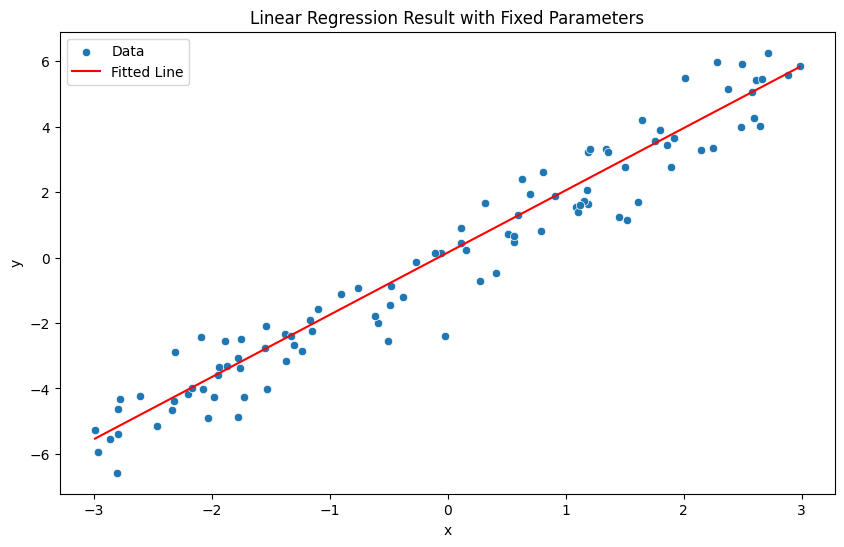

In [23]:
m =  1.2334
c =  1.2614
lr = 0.03
epochs = 100
for epoch in range(epochs):
    #forward pass
    Y_pred = m * x_rand + c    
    #calculate loss MAE
    #mean squared error
    loss = torch.sum(abs(Y_pred - y_rand) ** 2) / len(x_rand)
    #rmse
    #loss = torch.sqrt(loss)

    error = Y_pred - y_rand

    #calculate gradients
    m_grad =  (2/len(x_rand))*torch.sum(error*x_rand)
    c_grad = (2/len(x_rand))*torch.sum(error)

    #update m and c
    m =m -  learning_rate * m_grad
    c = c -  learning_rate * c_grad
    #print loss every 10 epochs
    if epoch % 10 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}, m: {m.item()}, c: {c.item()}')      
#plot the results
plt.figure(figsize=(10,6))
sns.scatterplot(x=x_rand.squeeze().numpy(), y=y_rand.squeeze().numpy(), label='Data')
sns.lineplot(x=x_rand.squeeze().numpy(), y=(m*x_rand + c).squeeze().detach().numpy(), color='red', label='Fitted Line')
plt.title('Linear Regression Result with Fixed Parameters')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()

In [ ]:
new_x = torch.tensor([[-1.5], [0], [1.0], [2.5], [3.0]])  

# Make predictions
predictions = best_m * new_x + best_c

print("Predictions:")
for x, y_pred in zip(new_x, predictions):
    print(f"x = {x.item():.2f} → y_pred = {y_pred.item():.2f}")

Predictions:
x = -1.50 → y_pred = -2.85
x = 0.00 → y_pred = -0.01
x = 1.00 → y_pred = 1.89
x = 2.50 → y_pred = 4.73
x = 3.00 → y_pred = 5.68
